# INTRO AND EDA

In this process, some initial investigations are performed to discover the structure and the content of the given dataset.

Importing the Python libraries we will be needing for our analysis.

In [29]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
from dateutil.parser import parse


Loading and reding the dataset.

In [30]:
data = pd.read_csv("/Users/gulnihal/Desktop/births2015/Births2015.csv")
print(data)

     Unnamed: 0        date  births wday  year  month  day_of_year  \
0             1  2015-01-01    8068  Thu  2015      1            1   
1             2  2015-01-02   10850  Fri  2015      1            2   
2             3  2015-01-03    8328  Sat  2015      1            3   
3             4  2015-01-04    7065  Sun  2015      1            4   
4             5  2015-01-05   11892  Mon  2015      1            5   
..          ...         ...     ...  ...   ...    ...          ...   
360         361  2015-12-27    7518  Sun  2015     12          361   
361         362  2015-12-28   13100  Mon  2015     12          362   
362         363  2015-12-29   13458  Tue  2015     12          363   
363         364  2015-12-30   13100  Wed  2015     12          364   
364         365  2015-12-31   11608  Thu  2015     12          365   

     day_of_month  day_of_week  
0               1            5  
1               2            6  
2               3            7  
3               4          

## Structured Based Data Exploration

Display the # of variables and observations

In [31]:
data.shape

(365, 9)

Display the variable names and their data types

In [32]:
data.dtypes

Unnamed: 0       int64
date            object
births           int64
wday            object
year             int64
month            int64
day_of_year      int64
day_of_month     int64
day_of_week      int64
dtype: object

Count the number of non-missing valuess for each variable

In [33]:
data.count()

Unnamed: 0      365
date            365
births          365
wday            365
year            365
month           365
day_of_year     365
day_of_month    365
day_of_week     365
dtype: int64

Display the firts 5 observation

In [34]:
data.head()

,Unnamed: 0,date,births,wday,year,month,day_of_year,day_of_month,day_of_week
0,1,2015-01-01,8068,Thu,2015,1,1,1,5
1,2,2015-01-02,10850,Fri,2015,1,2,2,6
2,3,2015-01-03,8328,Sat,2015,1,3,3,7
3,4,2015-01-04,7065,Sun,2015,1,4,4,1
4,5,2015-01-05,11892,Mon,2015,1,5,5,2


Display the last 5 observation

In [35]:
data.tail()

,Unnamed: 0,date,births,wday,year,month,day_of_year,day_of_month,day_of_week
360,361,2015-12-27,7518,Sun,2015,12,361,27,1
361,362,2015-12-28,13100,Mon,2015,12,362,28,2
362,363,2015-12-29,13458,Tue,2015,12,363,29,3
363,364,2015-12-30,13100,Wed,2015,12,364,30,4
364,365,2015-12-31,11608,Thu,2015,12,365,31,5


The summary of all the numerical variables present in out data frame such as mean, standart deviation or min max. 

In [36]:
data.describe()

,Unnamed: 0,births,year,month,day_of_year,day_of_month,day_of_week
count,365.000000,365.000000,365.0,365.000000,365.000000,365.000000,365.000000
mean,183.000000,10899.991781,2015.0,6.526027,183.000000,15.720548,4.002740
std,105.510663,2076.683881,0.0,3.452584,105.510663,8.808321,2.000685
min,1.000000,6515.000000,2015.0,1.000000,1.000000,1.000000,1.000000
25%,92.000000,8431.000000,2015.0,4.000000,92.000000,8.000000,2.000000
50%,183.000000,11883.000000,2015.0,7.000000,183.000000,16.000000,4.000000
75%,274.000000,12339.000000,2015.0,10.000000,274.000000,23.000000,6.000000
max,365.000000,13949.000000,2015.0,12.000000,365.000000,31.000000,7.000000


Distribution of number of births

count      365.000000
mean     10899.991781
std       2076.683881
min       6515.000000
25%       8431.000000
50%      11883.000000
75%      12339.000000
max      13949.000000
Name: births, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


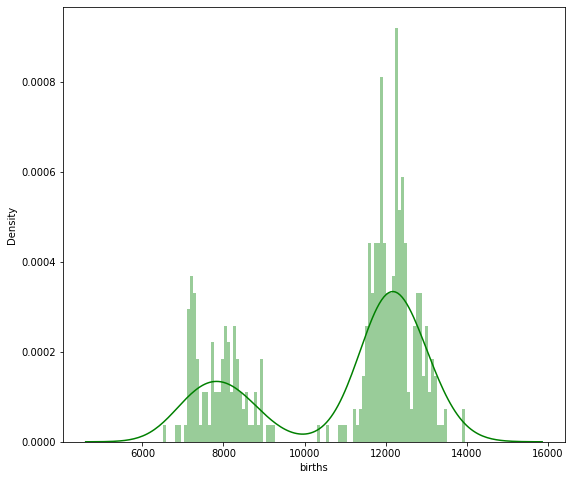

In [37]:
print(data['births'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(data['births'], color='g', bins=100, hist_kws={'alpha': 0.4});

Complete information of the data

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    365 non-null    int64 
 1   date          365 non-null    object
 2   births        365 non-null    int64 
 3   wday          365 non-null    object
 4   year          365 non-null    int64 
 5   month         365 non-null    int64 
 6   day_of_year   365 non-null    int64 
 7   day_of_month  365 non-null    int64 
 8   day_of_week   365 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 25.8+ KB


# Content Based Data Exploration

Detecting Duplicates

In [39]:
data.duplicated().sum()    

0

    no duplicated data
    
    if there was, we should use data.drop_duplicates() to remove the duplicates. 

Detecting unknown values in the data

In [40]:
data.isna().sum()   

Unnamed: 0      0
date            0
births          0
wday            0
year            0
month           0
day_of_year     0
day_of_month    0
day_of_week     0
dtype: int64

    no missing data 
    
    if there was, we should use df.dropna(axis=1,inplace=True) to remove the missing values.

## Plotting the Data

the distribution of the data

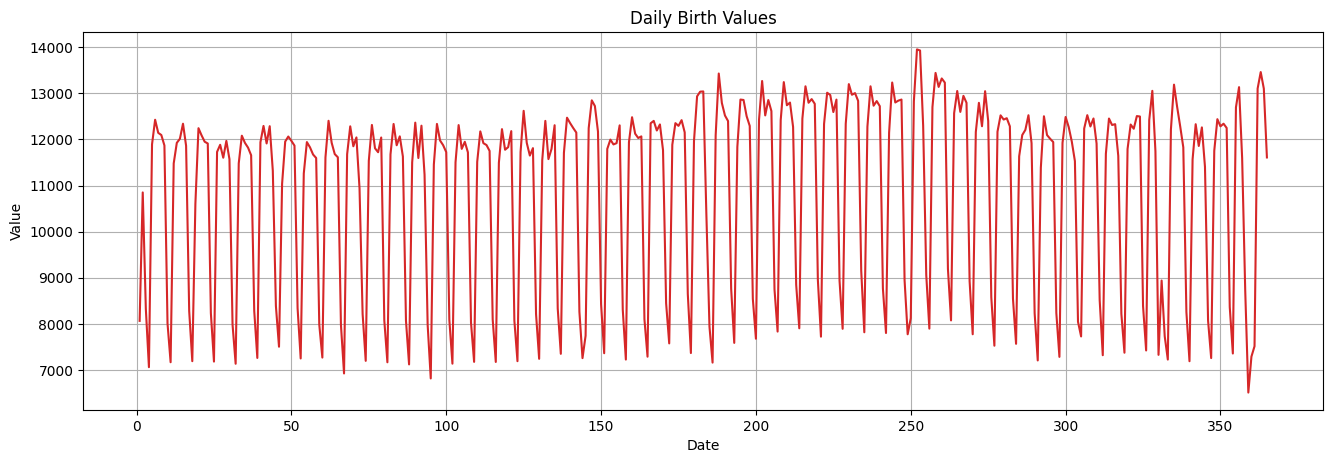

In [41]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.grid(True)
    plt.show()
    

plot_df(data, x=data.day_of_year, y=data.births, title='Daily Birth Values')  

#no trend, seasonality only

Tried to find which features are strongly correlated with "births"

plot the features versus value to see if they show some kind of pattern

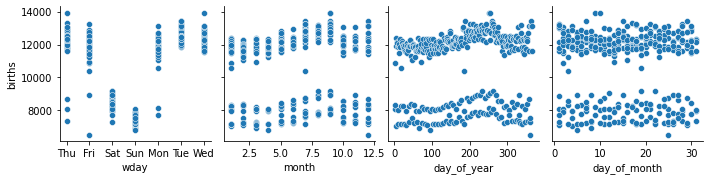

In [42]:
#sns.pairplot(data)
pp = sns.pairplot(data=data, y_vars=['births'], x_vars=["wday",'month',"day_of_year","day_of_month"])


    No correlation between month, day_of_year , day_of_month and births. There is some kind of pattern with wday

To see overall picture, I used sscatterplot

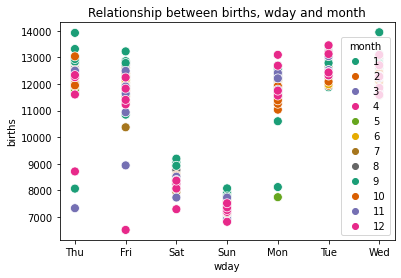

In [43]:

sns.scatterplot(x="wday", y="births", hue="month", data=data, palette="Dark2", s=80)
plt.title("Relationship between births, wday and month")
plt.show()

    Previous conclusions are made.

Correlation Plot : it shows the correlation among the variables and gives a fair idea of the correlation strength between different variables.

<AxesSubplot:>

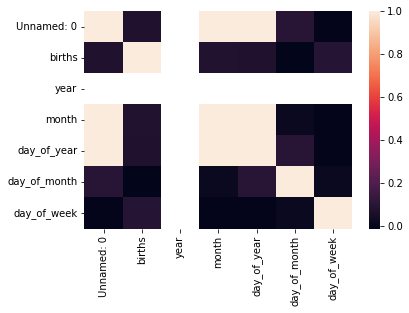

In [44]:
sns.heatmap(data.corr())


see the pattern monthly

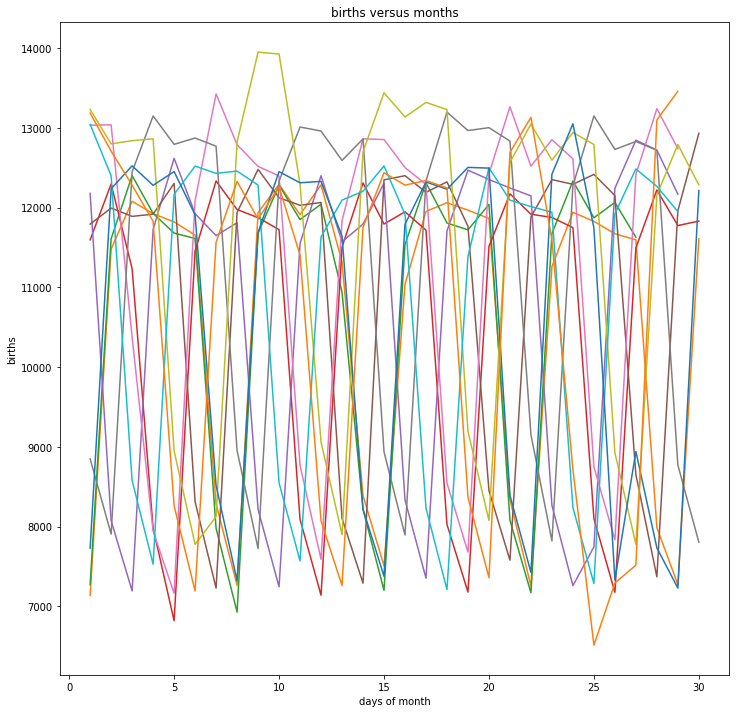

In [45]:

data["month"][1].sum()
days = np.linspace(1,360,360,dtype=int)

days_month=[]
plt.figure(figsize=(12,12))
plt.xlabel("days of month")
plt.ylabel("births")
plt.title("births versus months")
k = 1
for i in days :
    if data["day_of_month"][i-1] != 1:
        days_month.append(k)
        k=k+1
    else :
        plt.plot(days_month,data["births"][i-1:i+len(days_month)-1])
        days_month=[]
        k=1
 

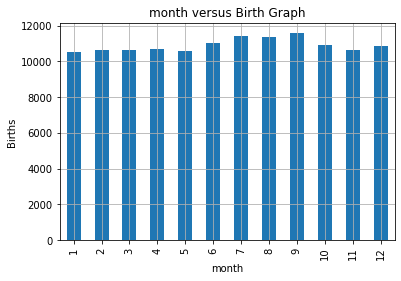

In [46]:
data.groupby("month")["births"].mean().plot.bar()
plt.title("month versus Birth Graph")
plt.xlabel("month")
plt.ylabel("Births")
plt.grid(True)
plt.show()


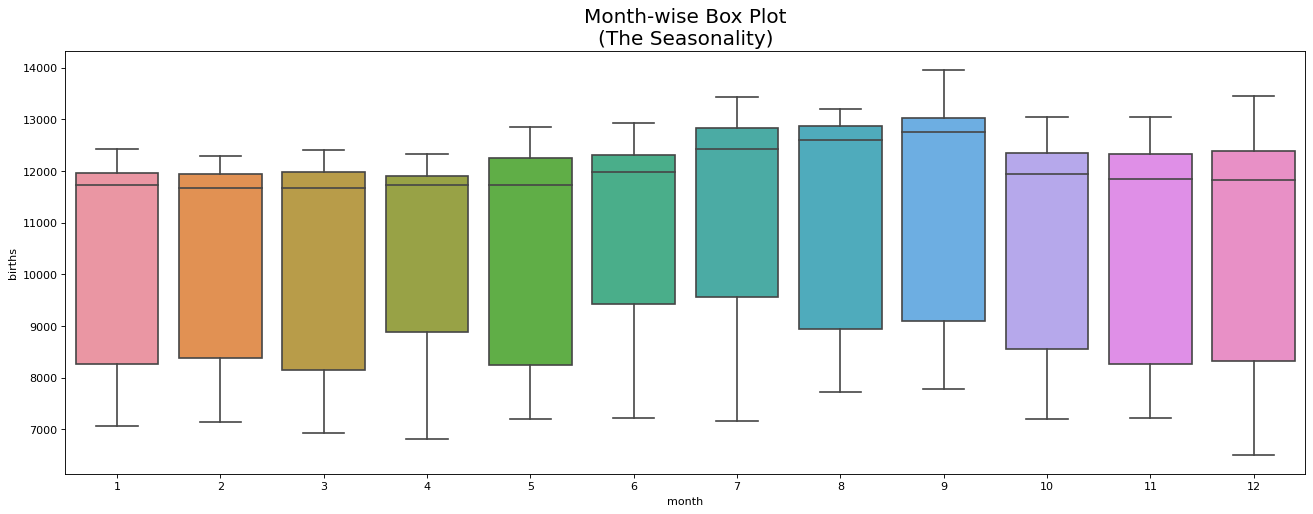

In [47]:
plt.figure(figsize=(20,7), dpi= 80) 
sns.boxplot(x='month', y='births', data=data)

plt.title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

    No correlation between monthly data

see the pattern weekly

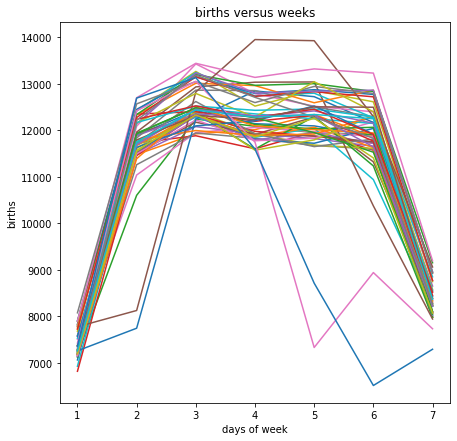

In [48]:
#seasonal weekly 

dayweek= np.linspace(4,354,51,dtype=int)
day= np.linspace(1,7,7,dtype=int)
plt.figure(figsize=(7,7))
plt.xlabel("days of week")
plt.ylabel("births")
plt.title("births versus weeks")
    
for i in dayweek:
    plt.plot(day,data["births"][i-1:i+6])


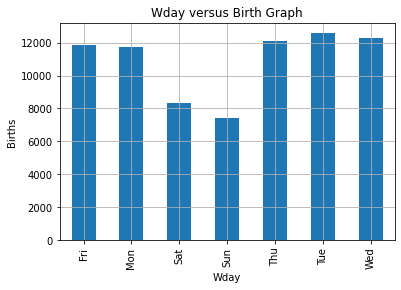

In [49]:
data.groupby("wday")["births"].mean().plot.bar()
plt.title("Wday versus Birth Graph")
plt.xlabel("Wday")
plt.ylabel("Births")
plt.grid(True)
plt.show()

    relative correlation between weekly data

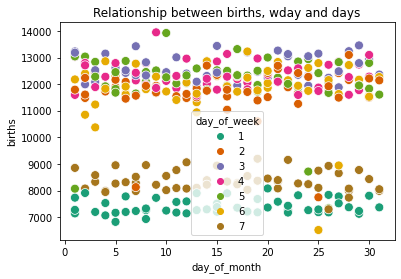

In [50]:
sns.scatterplot(x="day_of_month", y="births", hue="day_of_week", data=data, palette="Dark2", s=80)
plt.title("Relationship between births, wday and days")
plt.show()

One hot encoding 

comparing the sum of value of births on weekends and weekdays.

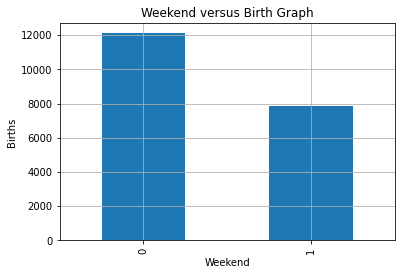

In [51]:
weekend = []
for i in range(365):
    if data["wday"][i] == "Sun" or  data["wday"][i] == "Sat":
        weekend.append(1)
    else:
        weekend.append(0)

data["IsWeekend"]= weekend

data.groupby("IsWeekend")["births"].mean().plot.bar()
plt.title("Weekend versus Birth Graph")
plt.xlabel("Weekend")
plt.ylabel("Births")
plt.grid(True)
plt.show()


    Relatively high number of births on weekdays.

## Trend and Seasonality 

Time series datas are consists of trend and seasonality whic are the increasing or decreasing values in the series and the repeating short-term cycle in the series respectively. 

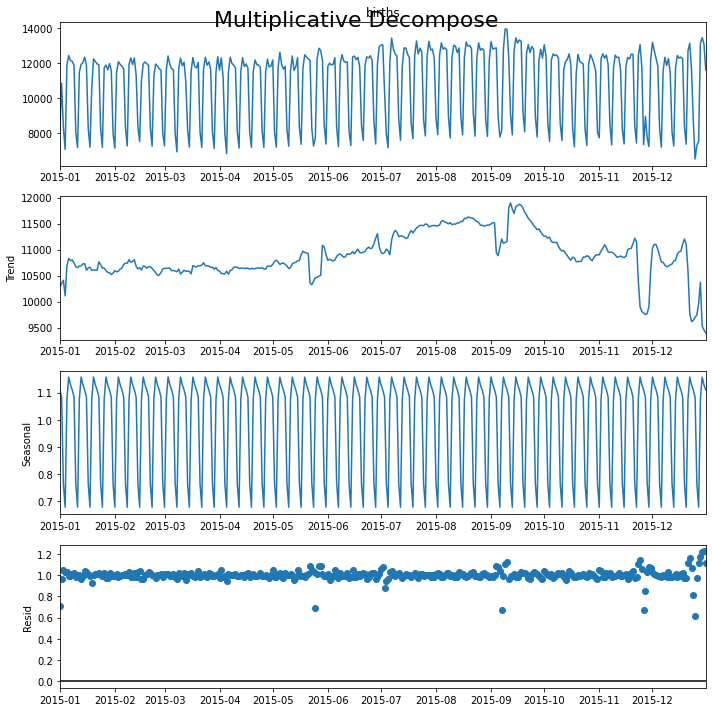

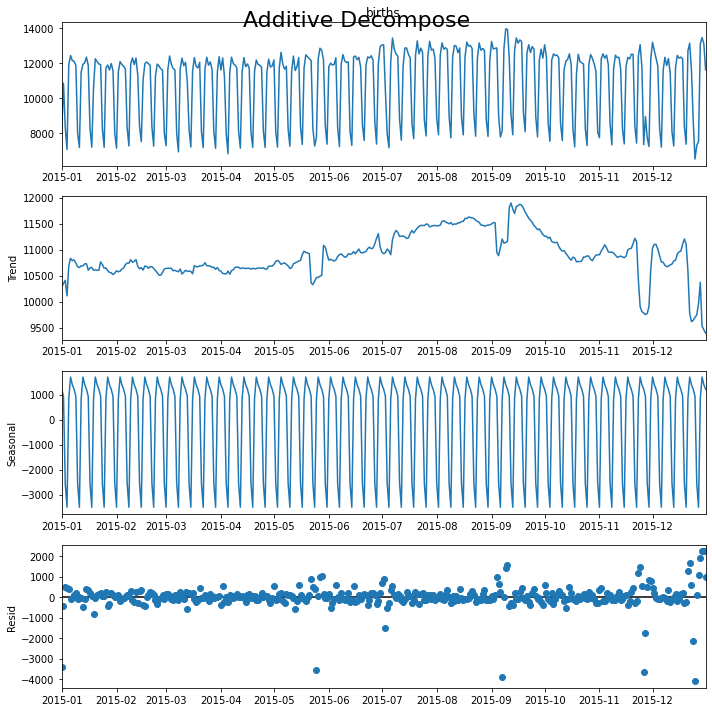

In [52]:

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

data = pd.read_csv("/Users/gulnihal/Desktop/births2015/Births2015.csv", parse_dates=['date'], index_col='date')


result_mul = seasonal_decompose(data['births'], model='multiplicative', extrapolate_trend='freq')


result_add = seasonal_decompose(data['births'], model='additive', extrapolate_trend='freq')


plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()